<a href="https://colab.research.google.com/github/namitasathish/Sonar-Data-Classification/blob/main/sonar_rock_vs_mine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data Collection

In [6]:
data=pd.read_csv("/content/sonar data.csv",header=None)


In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
data.shape

(208, 61)

In [9]:
data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

#Data Processing

In [10]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


separating data and lables

In [11]:
x=data.drop(columns=60,axis=1)
y=data[60]

training and test data

In [12]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [13]:
print(x.shape, xtrain.shape, xtest.shape)

(208, 60) (187, 60) (21, 60)


#Model training and Evaluation

In [14]:
model=LogisticRegression()


In [15]:
model.fit(xtrain,ytrain)

LogisticRegression()

accuracy on training data

In [16]:
xtrain_p=model.predict(xtrain)
traindataacc=accuracy_score(xtrain_p, ytrain)

In [17]:
print(traindataacc)

0.8342245989304813


accuracy on test data

In [18]:
xtest_p=model.predict(xtest)
testdataacc=accuracy_score(xtest_p, ytest)

In [19]:
print(testdataacc)

0.7619047619047619


#Predictive System

In [20]:
inputdata=(0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,0.2228,0.3106,0.4144,0.5157,0.5369,0.5107,0.6441,0.7326,0.8164,0.8856,0.9891,1.0000,0.8750,0.8631,0.9074,0.8674,0.7750,0.6600,0.5615,0.4016,0.2331,0.1164,0.1095,0.0431,0.0619,0.1956,0.2120,0.3242,0.4102,0.2939,0.1911,0.1702,0.1010,0.1512,0.1427,0.1097,0.1173,0.0972,0.0703,0.0281,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067)
#changing into numpy array
inputnum=np.asarray(inputdata)
#reshape numpy array
inputre=inputnum.reshape(1,-1)
prediction=model.predict(inputre)
print(prediction)

if(prediction[0]=="R"):
  print("The SONAR has detected a rock")
else:
  print("the SONAR has detected a mine")


['M']
the SONAR has detected a mine


#Visual representation of Class distribution

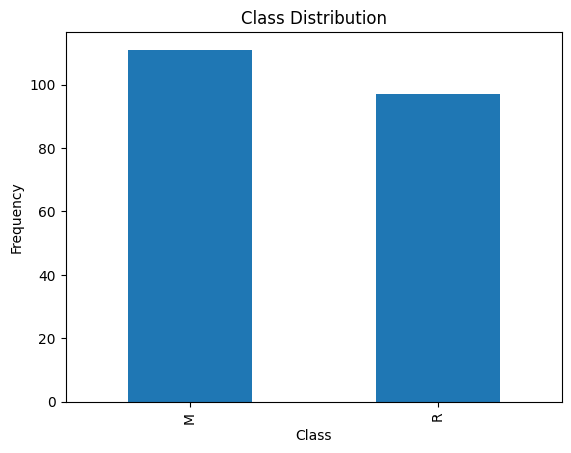

In [24]:
import matplotlib.pyplot as plt
data[60].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()